In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


In [14]:
print("hello")

hello


In [15]:
# Data Transformation
print("Setting up data transformations...")
data_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),  # Data augmentation
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])



Setting up data transformations...


In [16]:
# Load Datasets
print("Loading datasets...")
training_dataset = torchvision.datasets.FashionMNIST(
    root="./data", train=True, download=True, transform=data_transforms
)

testing_dataset = torchvision.datasets.FashionMNIST(
    root="./data", train=False, download=True, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
)



Loading datasets...


Creating data loaders...
Defining the model...
Using device: cpu
Starting training loop...
Epoch 1/20
Processing batch 0/858
Processing batch 50/858
Processing batch 100/858
Processing batch 150/858
Processing batch 200/858
Processing batch 250/858
Processing batch 300/858
Processing batch 350/858
Processing batch 400/858
Processing batch 450/858
Processing batch 500/858
Processing batch 550/858
Processing batch 600/858
Processing batch 650/858
Processing batch 700/858
Processing batch 750/858
Processing batch 800/858
Processing batch 850/858
Evaluating model...
Calculating accuracy...
Calculating accuracy...
Epoch 1/20 completed.
Train Accuracy: 82.97% | Test Accuracy: 81.97%
Loss: 0.9481

Epoch 2/20
Processing batch 0/858
Processing batch 50/858
Processing batch 100/858
Processing batch 150/858
Processing batch 200/858
Processing batch 250/858
Processing batch 300/858
Processing batch 350/858
Processing batch 400/858
Processing batch 450/858
Processing batch 500/858
Processing batch 

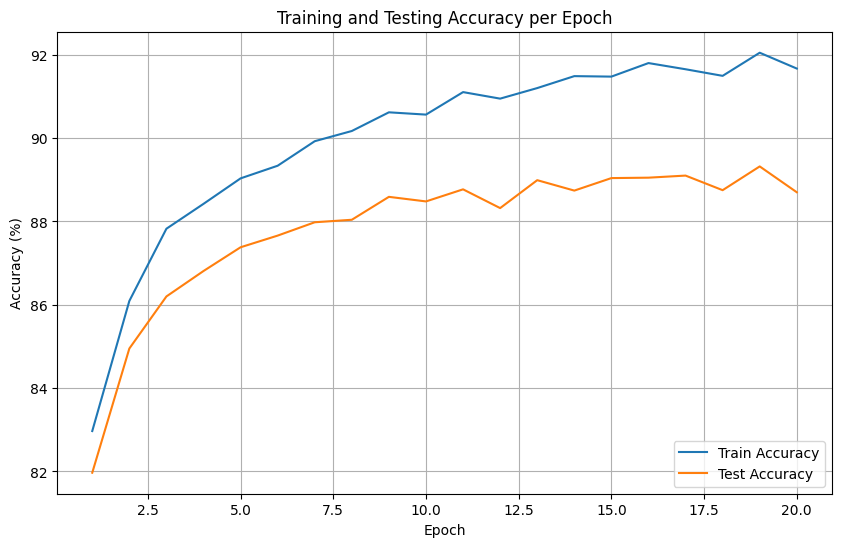

Training complete!


In [25]:
batch_size = 70
print("Creating data loaders...")
training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
testing_loader = torch.utils.data.DataLoader(testing_dataset, batch_size=batch_size, shuffle=False)

# Model Definition
print("Defining the model...")
class FashionMNIST_CNN(nn.Module):
    def __init__(self):
        super(FashionMNIST_CNN, self).__init__()
        self.conv_layer1 = nn.Conv2d(1, 8, kernel_size=5, stride=2, padding=2)
        self.batch_norm1 = nn.BatchNorm2d(8)  # Batch normalization
        self.conv_layer2 = nn.Conv2d(8, 16, kernel_size=3, stride=2, padding=1)
        self.batch_norm2 = nn.BatchNorm2d(16)
        self.conv_layer3 = nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1)
        self.batch_norm3 = nn.BatchNorm2d(32)
        self.conv_layer4 = nn.Conv2d(32, 32, kernel_size=3, stride=2, padding=1)
        self.batch_norm4 = nn.BatchNorm2d(32)
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc_layer = nn.Linear(32, 10)

    def forward(self, input_data):
        input_data = F.relu(self.batch_norm1(self.conv_layer1(input_data)))
        input_data = F.relu(self.batch_norm2(self.conv_layer2(input_data)))
        input_data = F.relu(self.batch_norm3(self.conv_layer3(input_data)))
        input_data = F.relu(self.batch_norm4(self.conv_layer4(input_data)))
        input_data = self.avg_pool(input_data)
        input_data = torch.flatten(input_data, 1)  # Flatten all dimensions except batch
        output_data = self.fc_layer(input_data)
        return output_data

# Setup Model, Loss, and Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
model = FashionMNIST_CNN().to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=3e-4)

# Accuracy Calculation Function
def calculate_accuracy(data_loader, network_model):
    print("Calculating accuracy...")
    correct_predictions = 0
    total_samples = 0
    network_model.eval()  # Evaluation mode
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            predictions = network_model(images)
            _, predicted_classes = torch.max(predictions.data, 1)
            total_samples += labels.size(0)
            correct_predictions += (predicted_classes == labels).sum().item()
    return 100 * correct_predictions / total_samples

# Training Loop
num_epochs = 20
training_accuracy, testing_accuracy = [], []

print("Starting training loop...")
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    model.train()  # Training mode
    epoch_loss = 0.0

    for batch_idx, (image_batch, label_batch) in enumerate(training_loader):
        if batch_idx % 50 == 0:
            print(f"Processing batch {batch_idx}/{len(training_loader)}")

        image_batch, label_batch = image_batch.to(device), label_batch.to(device)

        optimizer.zero_grad()

        batch_predictions = model(image_batch)
        batch_loss = loss_function(batch_predictions, label_batch)
        batch_loss.backward()
        optimizer.step()

        epoch_loss += batch_loss.item()

    print("Evaluating model...")
    train_acc = calculate_accuracy(training_loader, model)
    test_acc = calculate_accuracy(testing_loader, model)
    training_accuracy.append(train_acc)
    testing_accuracy.append(test_acc)

    # Print Statistics
    print(f"Epoch {epoch + 1}/{num_epochs} completed.")
    print(f"Train Accuracy: {train_acc:.2f}% | Test Accuracy: {test_acc:.2f}%")
    print(f"Loss: {epoch_loss / len(training_loader):.4f}\n")

# Plot Training and Testing Accuracy
print("Plotting results...")
epoch_indices = np.arange(1, num_epochs + 1)
plt.figure(figsize=(10, 6))
plt.plot(epoch_indices, training_accuracy, label='Train Accuracy')
plt.plot(epoch_indices, testing_accuracy, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracy per Epoch')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print("Training complete!")
